### Assignment 11 - PCA
### By Sourita Nag and Sarah Ruckman

In [1]:
import pandas as pd
import numpy as np
import torch
import imageio as imageio
import matplotlib.pyplot as plt 
import glob
import cv2

torch.Size([128, 128])

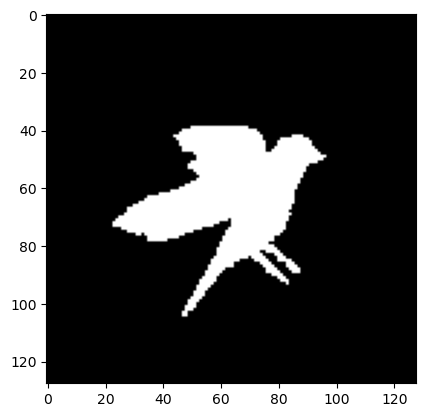

In [2]:
#Creating the bird tensor
bird_img = imageio.v2.imread('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/bird128.png')
plt.imshow(bird_img,cmap = 'gray')
bird_img

bird_tensor = torch.from_numpy(bird_img/255).float()
bird_tensor.shape

In [3]:
#creating the horses tensor
horse_imgs = []
for img in glob.glob("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/horses/*.png"):
    n= cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    horse_imgs.append(n)
    
print(horse_imgs[0].shape)
    
len(horse_imgs)

horse_imgs = [torch.tensor(val) for val in horse_imgs]
print(torch.max(horse_imgs[-1])) #Maximum value is 225

horse_imgs = [val/225 for val in horse_imgs]
horse_imgs = torch.stack([torch.detach(img).clone() for img in horse_imgs])
print(horse_imgs.shape)
torch.max(horse_imgs)

(128, 128)
tensor(255, dtype=torch.uint8)
torch.Size([327, 128, 128])


tensor(1.1333)

### Part a - Plot of the eigen values

torch.Size([16384])
torch.Size([327, 16384])
torch.Size([327, 327]) torch.Size([327]) torch.Size([16384, 16384])


Text(0.5, 1.0, 'Plot of the Eigen Values')

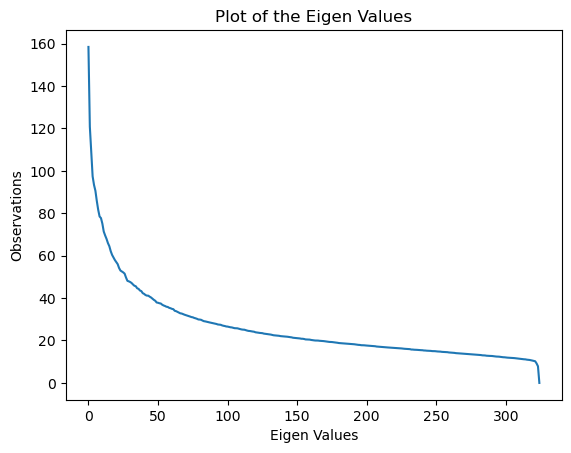

In [4]:
horse_imgs.shape
horse_imgs = horse_imgs.view(horse_imgs.shape[0],-1)
horse_imgs.shape

mx = torch.mean(horse_imgs,0)
print(mx.shape)

horse_ctd_imgs = horse_imgs - mx
print(horse_ctd_imgs.shape)

U,S,Vh = torch.linalg.svd(horse_ctd_imgs)
print(U.shape,S.shape,Vh.shape)

#selecting the eigen values from the third largest
eigen_vals = S[2:]
eigen_vals.shape

plt.plot(eigen_vals)
plt.xlabel('Eigen Values')
plt.ylabel('Observations')
plt.title('Plot of the Eigen Values')

### Part b - Plot of the PCs

torch.Size([327, 327]) torch.Size([327]) torch.Size([16384, 16384])
torch.Size([2, 16384])
torch.Size([327, 2])


Text(0.5, 1.0, 'Plot of the Principal Components')

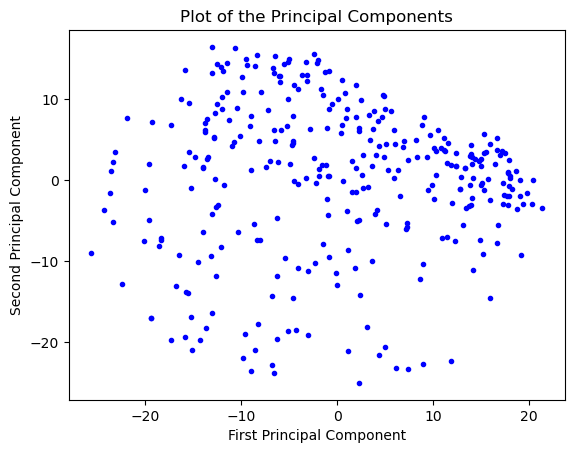

In [5]:
U,S,Vh = torch.linalg.svd(horse_ctd_imgs)
print(U.shape,S.shape,Vh.shape)

P = Vh[:2,:]
P.shape
print(P.shape)

C=horse_ctd_imgs@P.t()
print(C.shape)

plt.plot(C[:,0],C[:,1],'b.')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Plot of the Principal Components')

In [6]:
#Px=mx+C@P
#print(Px.shape)

### Part c - Plotting the coordinates of horse and bird

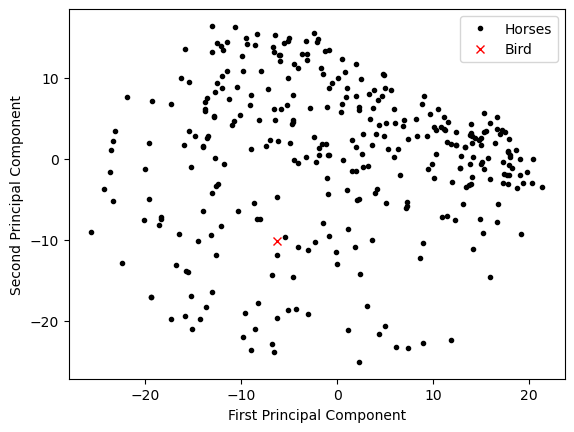

In [7]:
#working on the bird tensors
bird_tensor = bird_tensor.view(1,-1)
bird_tensor.shape
bird_ctd_img = (bird_tensor - mx)
bird_ctd_img.shape

Proj_bird = bird_ctd_img@P.t()
Proj_bird.shape

#Plotting together
plt.plot(C[:,0],C[:,1],'k.',label = 'Horses')
plt.plot(Proj_bird[0][0],Proj_bird[0][1],'rx',label = 'Bird')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

### Part d - reconstruction of horse image

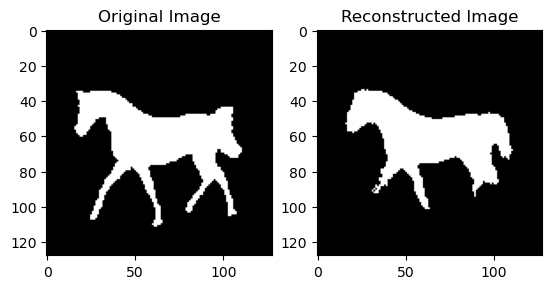

In [9]:
horse_60img = (imageio.v2.imread('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/horses\horse060.png'))
horse_60img.shape
horse_60img = torch.from_numpy(horse_60img/255).float()
horse_60img.shape

horse_60img = horse_60img.view(1,-1)   #subtracting the mean
horse_60img.shape
horse_60img = horse_60img - mx

PC_20 = Vh[:20,:]
PC_20.shape

horse_proj = horse_60img@PC_20.t()
horse_proj.shape

recontr_horse_img = horse_proj@PC_20 + mx
recontr_horse_img.shape

horse_60img = (imageio.v2.imread('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/horses\horse060.png'))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(np.array(horse_60img).reshape(128, 128) > 0.5, cmap='gray')
plt.title('Original Image')

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(np.array(recontr_horse_img).reshape(128, 128) > 0.5, cmap='gray')
plt.title('Reconstructed Image')

plt.show()

### Part e - reconstruction of the bird image with horse Pc's

torch.Size([1, 16384])


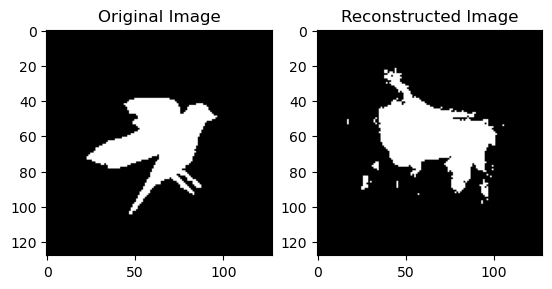

In [10]:
bird_ctd_img
PC_20 = Vh[:20,:]
PC_20.shape

bird_proj = bird_ctd_img@PC_20.t()
bird_proj.shape

recontr_bird = bird_proj@PC_20 + mx
print(recontr_bird.shape)
# plt.imshow(np.array(recontr_bird).reshape(128,128) > 0.5,cmap = 'gray')
# plt.show()
bird_img = imageio.v2.imread('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/bird128.png')

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(np.array(bird_img).reshape(128, 128) > 0.5, cmap='gray')
plt.title('Original Image')

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(np.array(recontr_bird).reshape(128, 128) > 0.5, cmap='gray')
plt.title('Reconstructed Image')

plt.show()


### Part f - distances

torch.Size([327, 32])


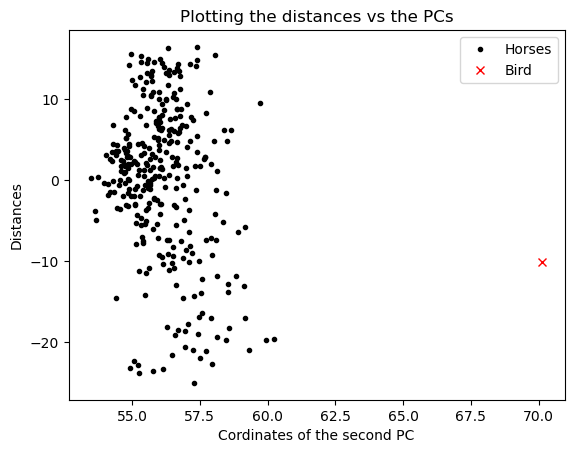

In [11]:
## For Horses
P1 = Vh[:32,:]
Proj_horse = horse_ctd_imgs@P1.t()
print(Proj_horse.shape)
reconstr_horse_32 = Proj_horse@P1 + mx
reconstr_horse_32.shape

distances_horses = torch.linalg.norm(horse_ctd_imgs - reconstr_horse_32, axis=1)
distances_horses.shape

## For birds
Proj_birds = bird_ctd_img@P1.t()
Proj_birds.shape

reconstr_bird_32 = Proj_birds@P1 + mx
reconstr_bird_32.shape

distance_bird = torch.linalg.norm(bird_ctd_img - reconstr_bird_32, axis=1)
distance_bird

#Plotting the required
plt.plot(distances_horses,Proj_horse[:,1],'k.',label = 'Horses')
plt.plot(distance_bird,Proj_birds[:,1],'rx',label = 'Bird')
plt.legend()
plt.ylabel('Distances')
plt.xlabel('Cordinates of the second PC')
plt.title('Plotting the distances vs the PCs')
plt.show()

### Part g - Histogram of horse distances

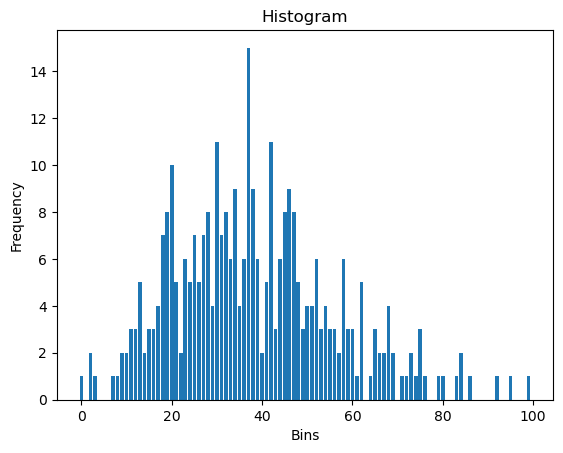

In [12]:
histogram = torch.histc(distances_horses)

# Plot the histogram
plt.bar(range(len(histogram)), histogram)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()